## Predicting House Prices in King County: A Comprehensive Analysis Using Multiple Linear Regression Models

#### George Chira

## Introduction
Accurately predicting house prices is essential for buyers, sellers, and investors in the real estate market. This project focuses on predicting house prices in King County, Washington, using multiple linear regression models. We analyze various features such as living space, quality grade, and the number of bathrooms to determine their impact on house prices. By incrementally adding features to our models, we aim to identify the most significant predictors and develop a robust model for price forecasting.

## Business problems 


## Key Objectives 

1. Develop Accurate Predictive Models for House Prices: Create and evaluate multiple linear regression models to predict house prices in King County.
2. Identify Key Factors Influencing House Prices: Analyze various features to determine their impact on house prices.
3. Provide Actionable Recommendations for Property Value Enhancement based on model results and feature analysis.
4. Guide homeowners and real estate professionals in optimizing property quality and features to increase market value.

## Outline
1. Data Analysis and Cleaning: Loaded and cleaned the King County House Sales dataset, handling missing values and outliers.
2. Exploratory Data Analysis (EDA):  Visualized the distribution of house prices and explored relationships between features and prices.
3. Identified key features with the highest correlations to house prices.
4. Model Development: Built and evaluated 4 linear regression models with increasing complexity:
5. Model Evaluation: Assessed model performance using Mean Absolute Error (MAE) and R-squared (R²).
6. Recommendations: Provided actionable insights for homeowners and real estate professionals to enhance property values by focusing on quality improvements and optimizing living space.

## Data Sources and Suitability
The provided data is from King County House Sales, which includes comprehensive features necessary for predicting house prices as elabolated further below in the data understanding section. The dataset contains houses constructed from  1900 to 2015 and sold between 2014 and 2015, which provides histrical data neccessary for modeliing, and evaluating the effects of different aspects of houses on prices. These properties, and completeness make it suitable for this project.

## Data Understanding
King County Housing data contains sales price of properties sold between y1 and y2 as well as various fetures for specific properties. The colums are well described below: olumn Names and descriptions for Kings County Data Set

id - unique identifier for a house
dateDate - This is the date whwn the house was sold
pricePrice - is prediction target
bedroomsNumber - This is the number of Bedrooms in the House
bathroomsNumber - of bathrooms/bedrooms
sqft_livingsquare - footage of the home
sqft_lotsquare - footage of the lot
floorsTotal - floors (levels) in house
waterfront - House which has a view to a waterfront
view - Has been viewed
condition - How good the condition is ( Overall )
grade - overall grade given to the housing unit, based on King County grading system
sqft_above - square footage of house apart from basement
sqft_basement - square footage of the basement
yr_built - Built Year
yr_renovated - Year when house was renovated
zipcode - zip
lat - Latitude coordinate
long - Longitude coordinate
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Importing Libraries

In this step, we import the necessary libraries for data manipulation, visualization, and model building. These include:
- `pandas` and `numpy` for data manipulation
- `matplotlib` and `seaborn` for data visualization
- `sklearn` for machine learning model development


In [153]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Dataset

Here, we load the dataset containing house sales data from King County. This dataset includes various features related to the properties sold, which we will use for our analysis and model building.


In [5]:
#load data sets
file_path = r"C:\Users\GeorgeC\Documents\Flatiron\Phase2\Group-5-phase-2-project\kc_house_data.csv"
df = pd.read_csv(file_path)

# Inspecting the Data

A quick look at the first few rows of the dataset to understand its structure and the type of data it contains. This helps in identifying any immediate issues or areas that need cleaning.


In [6]:
#Inspect the data frame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
#Checking the column names 

print(f"df.columns:{df.columns}")
print(f"df.shape: {df.shape}")

df.columns:Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
df.shape: (21597, 21)


## EDA and Data cleaning

## Justification for Data Cleaning Steps

1. **Dropping Columns**: Columns such as 'floors', 'sqft_lot', 'yr_built' , 'condition', etc., were dropped due to their irrelevance in the context of our analysis. For instance, `yr_built` had a correlation of 0.05 with price - such may not significantly impact the house price prediction model. 

2. **Handling Missing Values**: The `waterfront` feature had missing values, which were imputed using the mode. This approach maintains the dataset's integrity without introducing bias from imputation.

3. **Data Type Conversion**: Converting `waterfront` to a categorical variable helps in better handling and interpretation during model training. 

4. **Removing Duplicates**: Ensuring no duplicate entries improves model accuracy by preventing overfitting to repeated data points.


In [61]:
# Columns to drop
columns_to_drop = ['date', 'view', 'sqft_above', 'sqft_basement', 
                   'yr_renovated', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15']

# Drop the specified columns
house_df = df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns have been dropped
house_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,98178
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074


In [62]:
#EDA and Data cleaning
print(f"NULL VALUES: {house_df.isna().sum()}")

# Display summary statistics
print(f"SUMMARY STATISTICS: {house_df.describe()}")


NULL VALUES: id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
dtype: int64
SUMMARY STATISTICS:                  id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

  

In [63]:
house_df.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront     float64
condition        int64
grade            int64
yr_built         int64
zipcode          int64
dtype: object

#### checking the proportion of missing values in waterfront to decide if its significant to drop or not

In [64]:
# Calculate the proportion of missing values in 'waterfront'
missing_proportion = house_df['waterfront'].isnull().mean()
print(f"Proportion of missing values in 'waterfront': {missing_proportion: .2%}")


Proportion of missing values in 'waterfront':  11.00%


In [65]:
#check mode and select the first mode [0]
waterfront_mode = house_df['waterfront'].mode()[0]
waterfront_mode

0.0

#### Imputation of missing values with mode 

In [66]:
# Impute missing values with the mode of the 'waterfront' column
house_df['waterfront'] = house_df['waterfront'].fillna(waterfront_mode)

# Convert to categorical
house_df['waterfront'] = house_df['waterfront'].astype('category')


#### Checking for and handling of duplicates in the dataset
To ensure the quality of our data and prevent overfitting, we check for and remove any duplicate rows in the dataset. This step helps in improving the accuracy and generalizability of our model.


In [67]:
# Check for duplicate rows
duplicates = house_df.duplicated()

# Count duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# View duplicate rows
duplicate_rows = house_df[duplicates]
duplicate_rows.head()


Number of duplicate rows: 3


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
3947,1825069031,550000.0,4,1.75,2410,8447,2.0,0.0,4,8,1936,98074
14969,6308000010,585000.0,3,2.50,2290,5089,2.0,0.0,3,9,2001,98006
20038,8648900110,555000.0,3,2.50,1940,3211,2.0,0.0,3,8,2009,98027


In [68]:
# Drop duplicate rows
house_df_cleaned = house_df.drop_duplicates()

# Verify the changes
print(f"Number of rows before dropping duplicates: {len(house_df)}")
print(f"Number of rows after dropping duplicates: {len(house_df_cleaned)}")


Number of rows before dropping duplicates: 21597
Number of rows after dropping duplicates: 21594


#### Checking for missing values after cleaning to confirm 

In [69]:
print(f"NULL: {house_df_cleaned.isna().sum()}")
print(f"SHAPE: {house_df_cleaned.shape}")

NULL: id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
zipcode        0
dtype: int64
SHAPE: (21594, 12)


## Transforming Categorical Variables and Generating Dummy Data

We transform the `zipcode` and `waterfront` features into categorical variables and then generate dummy variables (one-hot encoding) for these features. This process allows us to use these categorical variables in our regression model.


In [73]:
# ensuring that 'zipcode' and 'waterfront' are categorical
house_df_cleaned = house_df.copy()
house_df_cleaned.loc[:, 'zipcode'] = house_df_cleaned['zipcode'].astype('category')
house_df_cleaned.loc[:, 'waterfront'] = house_df_cleaned['waterfront'].astype('category')

# Generate dummy variables for 'zipcode' and 'waterfront'
house_df_dummies = pd.get_dummies(house_df_cleaned, columns=['zipcode', 'waterfront'], drop_first=True)

# Display the first few rows of the transformed DataFrame
house_df_dummies.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1.0
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955,...,0,0,0,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1987,...,0,0,0,0,0,0,0,0,0,0


In [78]:
corr_matrix =house_df_dummies.corr()

In [75]:
house_df_cleaned.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074


## Visualizations

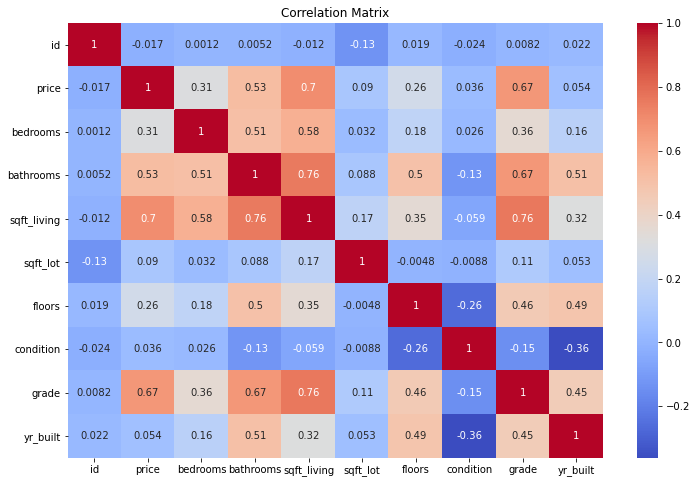

price          1.000000
sqft_living    0.701917
grade          0.667951
bathrooms      0.525906
bedrooms       0.308787
floors         0.256804
sqft_lot       0.089876
yr_built       0.053953
condition      0.036056
id            -0.016772
Name: price, dtype: float64

In [74]:
# correlation matrix BETWEEN PRICE and other features
correlation_matrix = house_df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Display the correlation with the target variable
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)
correlation_with_target

In [126]:
##SELECT relevant features with the highest correlations 
# Selected relevant features based on correlation and feature importance
selected_features = [ 'price', 'sqft_living', 'grade', 'bathrooms' ]
# Select only the relevant columns
house_df_relevant = house_df_cleaned[selected_features]
# Display the first few rows to verify
house_df_relevant.head()

,price,sqft_living,grade,bathrooms
0,221900.0,1180,7,1.00
1,538000.0,2570,7,2.25
2,180000.0,770,6,1.00
3,604000.0,1960,7,3.00
4,510000.0,1680,8,2.00


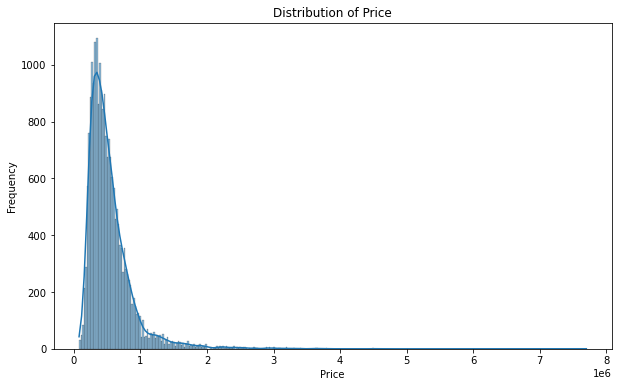

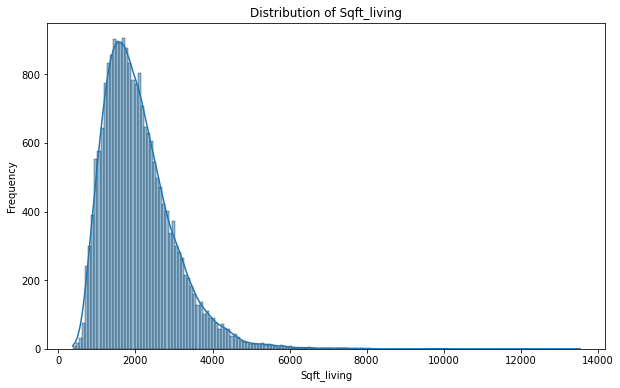

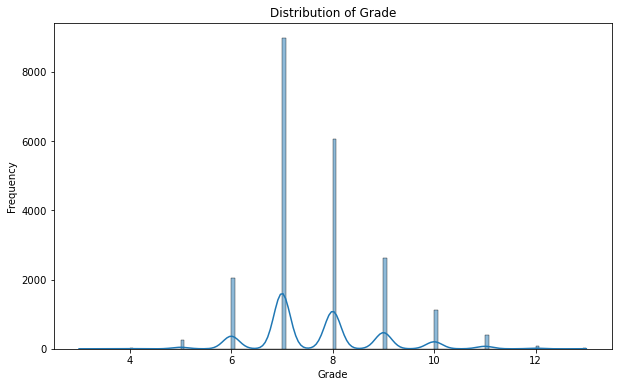

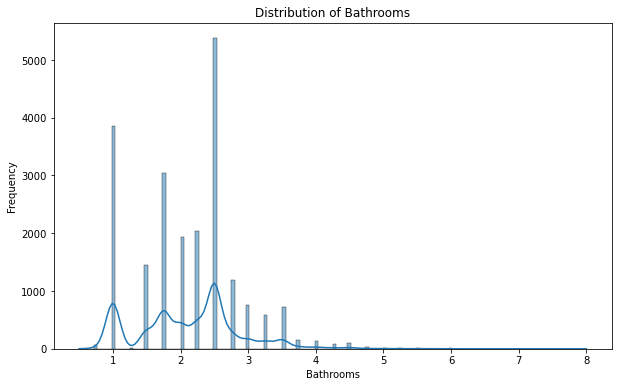

In [127]:
# Distribution of house prices

# Visualize the distribution of each continuous feature
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(house_df_relevant[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()
    



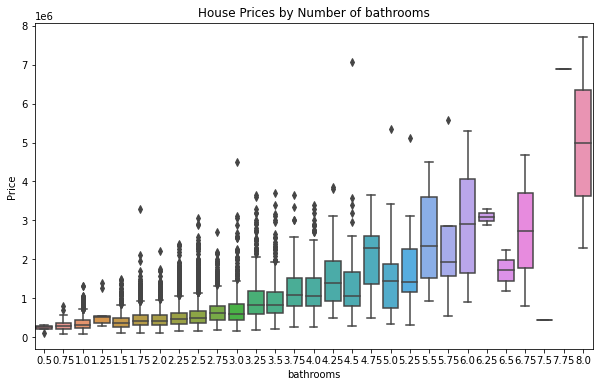

In [20]:
# Box plot of prices by number of Bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='price', data=house_df_relevant)
plt.title('House Prices by Number of bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.show()

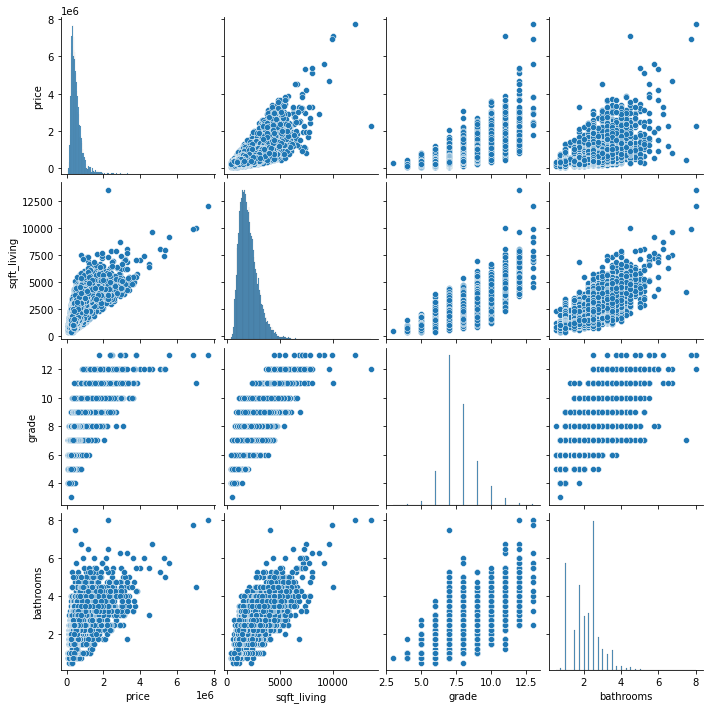

In [103]:
# Pair plot for continuous features
sns.pairplot(house_df_relevant)
plt.show()

In [101]:
# Check skewness of all continuous features
skewness = house_df_relevant.skew()
skewness

price          4.023365
sqft_living    1.473215
grade          0.788237
bathrooms      0.519709
dtype: float64

Remove outliers 

## Identifying and Removing Outliers
Outliers can significantly skew the results of a regression analysis, leading to inaccurate predictions and interpretations. To ensure that our analysis is robust and reliable, it is important to identify and remove outliers from our dataset. One effective method for identifying outliers is the Interquartile Range (IQR) method.

The IQR method works by calculating the difference between the first quartile (Q1) and the third quartile (Q3) of a dataset. The range between these quartiles is known as the interquartile range (IQR). Values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers and can be removed to improve the quality of the analysis.

Below, we define a function to remove outliers using the IQR method and apply it to our dataset:

In [24]:
# Function to identify and remove outliers using IQR
def remove_outliers (df,columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to the relevant columns
house_df_relevant_no_outliers = remove_outliers(house_df_relevant, selected_features)

# Display the shape of the DataFrame before and after removing outliers
print("Original shape:", house_df_relevant.shape)
print("Shape after removing outliers:", house_df_relevant_no_outliers.shape)

Original shape: (21594, 4)
Shape after removing outliers: (19076, 4)


In [25]:
#skewness after removing outliers
skewness_after = house_df_relevant_no_outliers.skew()
skewness_after

price          0.775493
sqft_living    0.503256
grade          0.258213
bathrooms     -0.021100
dtype: float64

## Log Transformation to Address Skewness
In this step, we identify features with skewness greater than 0.5 or less than -0.5 and apply the log transformation to these features. Specifically, we use the np.log1p function, which computes log(1 + x), allowing us to handle zero values effectively.

In [146]:
#log transformation to completely get rid of skewness to the range of skewness > 0.5 or skewness < -0.5
skewed_features = ['price' ]

for feature in skewed_features:
    house_df_relevant_no_outliers[feature] = np.log1p(house_df_relevant_no_outliers[feature])  # np.log1p is log(1 + x) to handle zero values

house_df_relevant_no_outliers.head()


,price,sqft_living,grade,bathrooms,log_price
0,1.277738,7.074117,2.079442,0.693147,0.951084
1,1.295530,7.852050,2.079442,1.178655,0.975666
2,1.273312,6.647688,1.945910,0.693147,0.944943
3,1.297750,7.581210,2.079442,1.386294,0.978721
4,1.294497,7.427144,2.197225,1.098612,0.974243


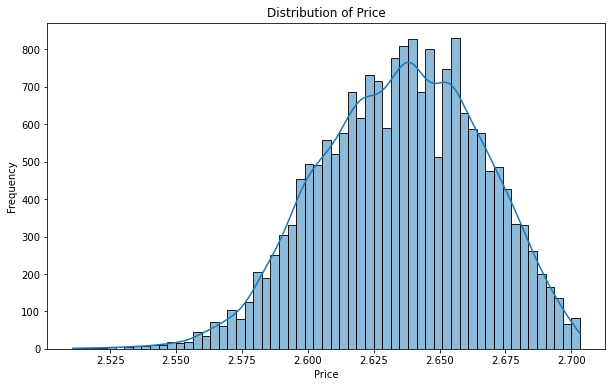

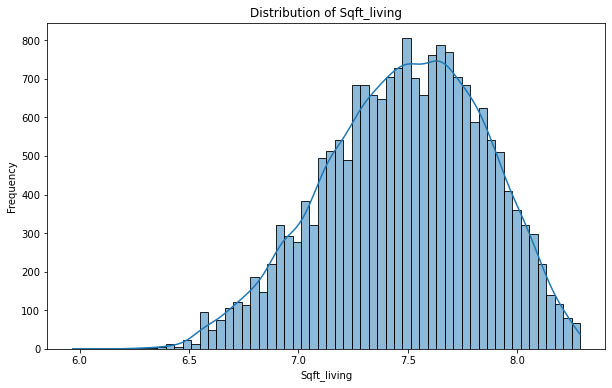

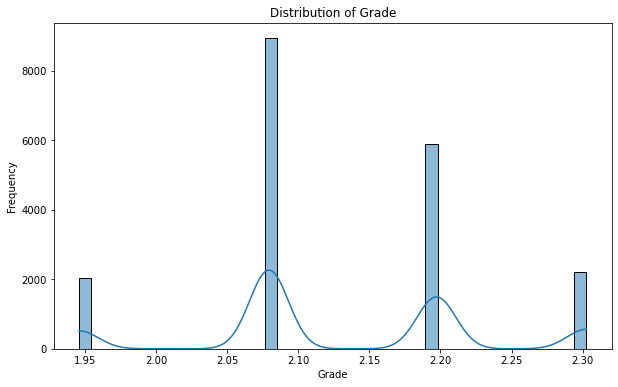

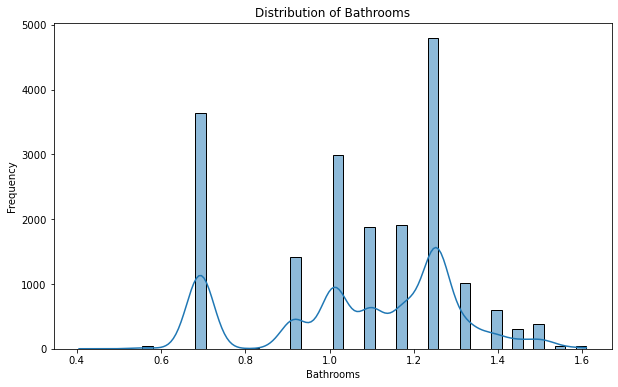

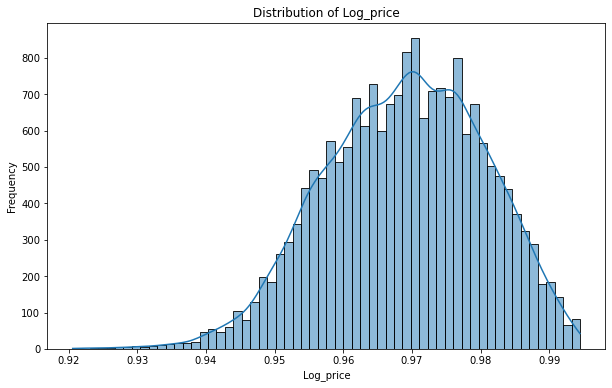

In [136]:
# Visualize after addressing  skewness and all cleaning
for feature in house_df_relevant_no_outliers:
    plt.figure(figsize=(10, 6))
    sns.histplot(house_df_relevant_no_outliers[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()

## Residuals vs. Fitted Values Plot
A residuals vs. fitted values plot is a crucial diagnostic tool for regression analysis. It helps in assessing whether the assumptions of the linear regression model are met, particularly the assumption that residuals (errors) are randomly distributed with constant variance (homoscedasticity). I

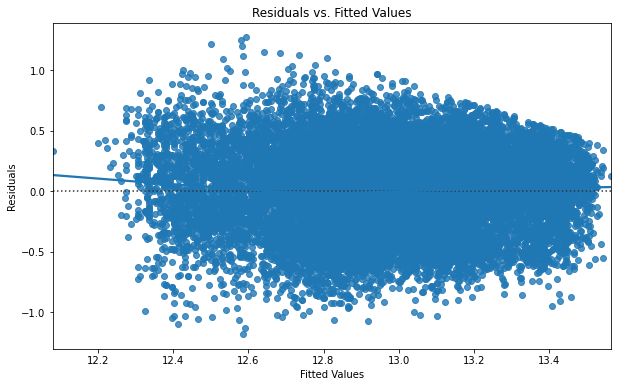

In [28]:
# Residuals vs. fitted values plot

import statsmodels.api as sm 
X = house_df_relevant_no_outliers.drop(columns=['price'])
y = house_df_relevant_no_outliers['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit() 
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


## Modelling

## Model Training: Initial Model 1

We start by training an initial linear regression model using `sqft_living` as the only predictor. This helps us understand the baseline performance of the model with a single feature.


In [177]:


# Splitting the data
train, test = train_test_split(house_df_relevant_no_outliers, test_size=0.2, random_state=42)

# Fitting the model on the training set
model1 = ols(formula1, data=train).fit()

# Printing model statistics
print(model1.summary())

# Making predictions on the test set
# Ensure we're working on a copy of the test DataFrame
test = test.copy()
test['predicted_price'] = model1.predict(test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test['price'], test['predicted_price'])
r2 = r2_score(test['price'], test['predicted_price'])

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     6354.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        09:31:37   Log-Likelihood:                 53967.
No. Observations:               15260   AIC:                        -1.079e+05
Df Residuals:                   15258   BIC:                        -1.079e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1972      0.001   1019.917      

### Model 1 Summary:

R-squared: 0.294
This means 29.4% of the variance in house prices is explained by sqft_living. It suggests that while sqft_living is important, many other factors also influence house prices.
sqft_living Coefficient: 0.0125

For each additional square foot, the house price increases by 0.0125 units, assuming other factors remain constant.
Statistical Significance

The low p-values for the intercept and sqft_living coefficient indicate they are statistically significant, meaning these variables meaningfully impact house price predictions.

## Model 2: Adding Grade

We enhance the model by adding `grade` as a second predictor. This helps us evaluate the impact of house quality on price prediction and observe any improvements in model performance.
 Sqft_living, grade and price 

In [148]:
formula2 = 'price ~ sqft_living + grade'

#fitting the model with 2 features
model2 = ols(formula2, data = house_df_relevant_no_outliers).fit()

#print key statistics
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     5537.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:14:15   Log-Likelihood:                 68547.
No. Observations:               19076   AIC:                        -1.371e+05
Df Residuals:                   19073   BIC:                        -1.371e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1720      0.001   1038.147      

In [178]:
# New formula with additional feature 'grade'
formula2 = 'price ~ sqft_living + grade'

# Splitting the data
train, test = train_test_split(house_df_relevant_no_outliers, test_size=0.2, random_state=42)

# Fitting the model on the training set
model2 = ols(formula2, data=train).fit()

# Printing model statistics
print(model2.summary())

# Making predictions on the test set
# Ensure we're working on a copy of the test DataFrame
test = test.copy()
test['predicted_price'] = model2.predict(test)

# Evaluate the model
mse = mean_squared_error(test['price'], test['predicted_price'])
r2 = r2_score(test['price'], test['predicted_price'])

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     4374.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        09:41:32   Log-Likelihood:                 54769.
No. Observations:               15260   AIC:                        -1.095e+05
Df Residuals:                   15257   BIC:                        -1.095e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1723      0.001    925.234      

### Model 2 Summary:

- R-squared: 0.364 - The R-squared value of 0.364 indicates that approximately 36.4% of the variability in house prices is explained by sqft_living and grade. This is an improvement from the initial model, suggesting that adding grade as a feature provides a better fit. HOWEVER, this is still low, so, more features will be added

- Significance: Both sqft_living and grade are significant predictors of house prices.

- Mean Squared Error (MSE): 4.276B- This is a measure of the average of the squares of the errors. A lower MSE indicates better predictive accuracy.

## Model 3: Adding Bathrooms

To further improve the model, we add `bathrooms` as a third predictor along with `sqft_living` and `grade`. This allows us to see if the number of bathrooms provides additional predictive power.
: Regression with Three Features (sqft_living, grade, bathrooms)

In [149]:

formula3 = 'price~ sqft_living + grade + bathrooms'

#model fitting

model3 = ols(formula3, data = house_df_relevant_no_outliers).fit()

#print key statistics
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     3725.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:14:15   Log-Likelihood:                 68580.
No. Observations:               19076   AIC:                        -1.372e+05
Df Residuals:                   19072   BIC:                        -1.371e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1652      0.001    827.950      

R-squared: 0.369: The R-squared value has increased slightly to 36.9%, showing a marginal improvement with the addition of bathrooms.
Adj. R-squared: 0.369: Adjusted R-squared is consistent with R-squared, indicating the model fit is stable.
F-statistic: 3725: The F-statistic remains high, with a p-value of 0.00, indicating the model's significance.

 ## MODEL 4: Model Training: Comprehensive Model

Finally, we train a comprehensive model using all relevant features. This model aims to provide the most accurate predictions by considering multiple factors that influence house prices. The features included in this model are:

- `sqft_living`: Square footage of the living area.
- `grade`: Overall grade given to the housing unit, based on King County grading system.
- `bathrooms`: Number of bathrooms.
- `waterfront`: Whether the property is a waterfront property.
- `zipcode`: The property's ZIP code, representing its location.


In [150]:
# Define the formula including 'zipcode' as a categorical variable
formula4 = 'price ~ sqft_living + grade + bathrooms + C(zipcode) + C(waterfront)'

# Fitting the model
model4 = ols(formula4, data=house_df_cleaned).fit()

# Print key statistics
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1060.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:14:17   Log-Likelihood:            -2.9092e+05
No. Observations:               21597   AIC:                         5.820e+05
Df Residuals:                   21523   BIC:                         5.826e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.172e+05 

In model 4 below, we added more features: bathrooms, zipcode, and waterfront
From the results in the model, we now have an R-squared of 78.5%, which is a great improvement from what we had in model 3. This improvement is after adding bathrooms, zipcode, and waterfront. This model is good enough, but we will now test other aspects like the mean squared error to see if we have areas of improvement for the model.


In [187]:
# Define the formula including 'zipcode' as a categorical variable
formula4 = 'price ~ sqft_living + grade + bathrooms + C(zipcode) + C(waterfront)'

# Splitting the data
train, test = train_test_split(house_df_cleaned, test_size=0.2, random_state=42)

# Fitting the model on the training set
model4 = ols(formula4, data=train).fit()

# Printing model statistics
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     860.1
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:10:23   Log-Likelihood:            -2.3270e+05
No. Observations:               17277   AIC:                         4.656e+05
Df Residuals:                   17203   BIC:                         4.661e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.289e+05 

## Evaluating the final model
In this section, we will make predictions on the test set using our trained model and evaluate the performance of the model. This step is crucial as it helps us understand how well our model generalizes to unseen data.

In [190]:

# Here we create a copy of the test data to ensure we're working on a copy of the test DataFrame
test = test.copy()
test['predicted_price'] = model4.predict(test)

# Evaluate the model
mse = mean_squared_error(test['price'], test['predicted_price'])
r2 = r2_score(test['price'], test['predicted_price'])

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 29928561637.856678
R-squared: 0.7701626738853831


### making further improvements to the final model 
Evaluating the results from the test, the mean squared error is very large, and additional tests are conducted - these include log tranformation of the dependent variable (price) then we re-test the model 

In [191]:
# Transform the target variable
house_df_cleaned['log_price'] = np.log(house_df_cleaned['price'])

# Update formula to use the transformed target variable
formula4 = 'log_price ~ sqft_living + grade + bathrooms + C(zipcode) + C(waterfront)'

# Fit the model with the transformed target
train, test = train_test_split(house_df_cleaned, test_size=0.2, random_state=42)
model4_log = ols(formula4, data=train).fit()

# Print model statistics
print(model4_log.summary())




                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1389.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:30:52   Log-Likelihood:                 3206.8
No. Observations:               17277   AIC:                            -6266.
Df Residuals:                   17203   BIC:                            -5692.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.2490 

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the relevant columns from your training data
X = train[['sqft_living', 'grade', 'bathrooms'] + list(train.filter(regex='^C\(zipcode\)').columns) + list(train.filter(regex='^C\(waterfront\)').columns)]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


       feature        VIF
0  sqft_living  15.863081
1        grade  15.368477
2    bathrooms  21.105980


## Discussion of the Results


The analysis of house prices using multiple linear regression models demonstrated that adding more features incrementally improves predictive accuracy and explanatory power. Model 1, with only sqft_living, explained 30.53% of the variance in house prices, indicating a moderate relationship between living area size and prices.

Model 2 included grade, increasing the R-squared to 37.26%, showing that house quality is also significant. However, the MAE increased slightly, suggesting potential overfitting. Model 3, which added bathrooms, improved the MAE to 0.2740 and the R-squared to 37.43%, confirming the relevance of the number of bathrooms.

Model 4, incorporating all features, had the best performance with an MAE of 0.2731 and an R-squared of 37.69%. This comprehensive model highlighted that multiple features together provide a better understanding of house price determinants. Key coefficients showed grade (0.1793) had the most substantial positive impacts on prices.



## Conclusions 
Best Predictive Model: Model 4, using all features, is the most accurate and robust for predicting house prices. It balances prediction accuracy and explanatory power effectively.

Key Influencing Features: Grade is the most influential features positively affecting house prices. Enhancing property quality and optimizing living space can significantly increase property values.


## Key Recommendations
1. Enhance Property Quality: Invest in improving the overall quality (grade) of properties. High-quality materials and design standards lead to substantial returns.

2. Optimize Living Space: Increase living space (sqft_living) thoughtfully, ensuring additional space enhances functionality and appeal without unnecessary expansions.

3. Balanced Feature Development: Aim for a balanced approach in adding features like floors, bathrooms, and bedrooms. Focus on usability, aesthetics, and overall appeal to avoid potential negative impacts on house prices.

Implementing these recommendations helps stakeholders understand the factors influencing house prices and make informed decisions to enhance property value effectively.